In [8]:
import torch
from sklearn.linear_model import LinearRegression
def load_tensors(task):
    # Construct the file paths
    a_path = f"./tasks/{task}/A_best.pt"
    b_path = f"./tasks/{task}/b_best.pt"
    z_path = f"./tasks/{task}/Z_best.pt"

    # Load the tensors
    A = torch.load(a_path)
    b = torch.load(b_path)
    Z = torch.load(z_path)

    return A, b, Z

# Example usage
task_name = "rnn_identity_numerical"  # replace with your task name
A, b, Z = load_tensors(task_name)


In [9]:
data = torch.load(f"../tasks/{task_name}/data.pt")

In [12]:
def linear(input, output, show_eqn=True):
    
    reg = LinearRegression().fit(input, output)
    score = reg.score(input, output)
    coeff = reg.coef_
    intercept = reg.intercept_

    if show_eqn:
        equation = "y = " + " + ".join([f"{coef}*x{idx}" for idx, coef in enumerate(coeff)]) + f" + {intercept}"
        print(f"Linear Equation:{equation}")
    return score, coeff, intercept, reg

def polynomial_fit(input, output, degree=2, show_eqn=True):
    poly = PolynomialFeatures(degree=degree)
    input_poly = poly.fit_transform(input)

    reg = LinearRegression().fit(input_poly, output)
    score = reg.score(input_poly, output)

    if show_eqn:
        # Formatting coefficients with corresponding powers
        equation_terms = [f"{coef}*x^{i}" for i, coef in enumerate(reg.coef_)]
        equation = "y = " + " + ".join(equation_terms) + f" + {reg.intercept_}"
        print(f"Polynomial Equation (degree {degree}): {equation}")

    return score, reg.coef_, reg.intercept_, reg

In [14]:
reg =linear(Z, data[1])[3]

Linear Equation:y = [0.0024143]*x0 + [0.00012095]*x1 + [-0.00066348]*x2 + [0.00025773]*x3 + [-0.00021277]*x4 + [-0.00175986]*x5 + [-3.9621176e-05]*x6 + [-0.0008606]*x7 + [0.0012445]*x8 + [-0.9999995]*x9 + [49.402878 49.45313  49.493126 49.4954   49.51714  49.572056 49.478893
 49.555614 49.41574  98.99793 ]


Hidden to Output

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create a heatmap using seaborn
sns.heatmap(reg[1], annot=True, fmt=".2f", linewidths=.5, cmap="coolwarm")
plt.title("Hidden to output")
plt.show()

TypeError: 'LinearRegression' object is not subscriptable

In [68]:
from sklearn.linear_model import LinearRegression
intercs=[]
for i in range(data[0].shape[1]-1):
    score,coef,inter = linear(np.concatenate([hiddens[:,-2-i],data[0]], axis=1), hiddens[:,-1-i], show_eqn=False)
    intercs.append(coef)
intercs = np.array(intercs).squeeze(1)

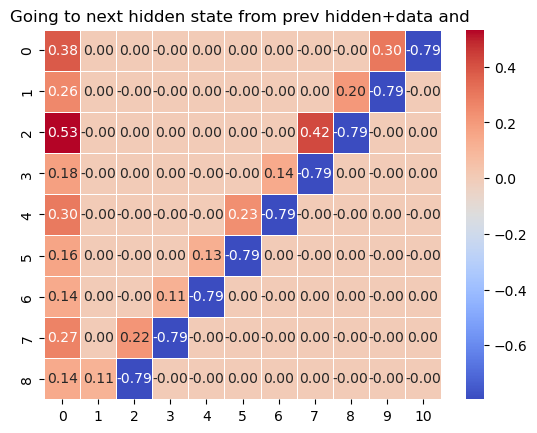

''

In [69]:
sns.heatmap(intercs, annot=True, fmt=".2f", linewidths=.5, cmap="coolwarm")
plt.title("Going to next hidden state from prev hidden+data and ")
plt.show()

""